# Lab3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math


In [2]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1-y) * np.log(1 - h)
    return (y_1 + y_0).sum() / X.shape[1]

In [3]:
def logistic_regression(X, y, theta, epsilon, learning_rate):
    prev_cost = 0
    cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while abs(cost - prev_cost) > epsilon:
        prev_cost = cost
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - learning_rate * (gradient.T / m)
        cost = calculate_cost(X, y, theta)

    return theta

In [4]:
def if_belongs(X, theta):
    n = X.shape[1]
    m = X.shape[0]
    belongs = [[], []]
    not_belongs = [[], []]

    for index in range(n):
        if h_fun(X[:, index], theta) >= 0.5:
            belongs[0].append(X[1, index])
            belongs[1].append(1)
        else:
            not_belongs[0].append(X[1, index])
            not_belongs[1].append(0)

    return np.array(belongs), np.array(not_belongs)

In [5]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

theta = np.array([[0], [0]])
eps = 1e-8
alpha = 0.001

theta = logistic_regression(X, y, theta, eps, alpha)

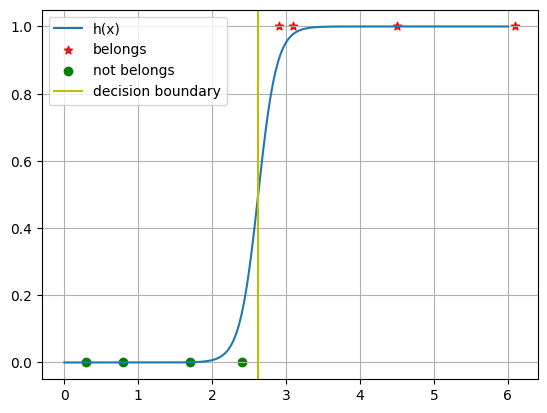

In [6]:
t = np.arange(0, 6.01, 0.01)
plot_t = np.array([np.repeat(1, len(t)), t])
plt.plot(plot_t[1, :], h_fun(plot_t, theta).T)
belongs, not_belongs = if_belongs(X, theta)
plt.scatter(belongs[0, :], belongs[1, :], marker='*', edgecolors='r')
plt.scatter(not_belongs[0, :], not_belongs[1, :], marker='o', color='g')
plt.axvline(x=-theta[0] / theta[1], ymin=0, ymax=1, color='y')
plt.legend(["h(x)", "belongs", "not belongs", "decision boundary"])
plt.grid("on")
plt.show()

### Zadanie 2

In [7]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])

X.shape=(3, 100)
y.shape=(1, 100)

In [8]:
def if_belongs_2D(X, theta, temp=True):
    if temp:
        n = X.shape[1] - 1
    else:
        n = X.shape[1]
    belongs = [[], []]
    not_belongs = [[], []]

    for index in range(n):
        if h_fun(X[:, index], theta) >= 0.5:
            belongs[0].append(X[1, index])
            belongs[1].append(X[2, index])
        else:
            not_belongs[0].append(X[1, index])
            not_belongs[1].append(X[2, index])

    return np.array(belongs), np.array(not_belongs)

In [9]:
theta = np.array([[0], [0], [0]])
eps = 1e-8
alpha = 0.0001

theta = logistic_regression(X, y, theta, eps, alpha)

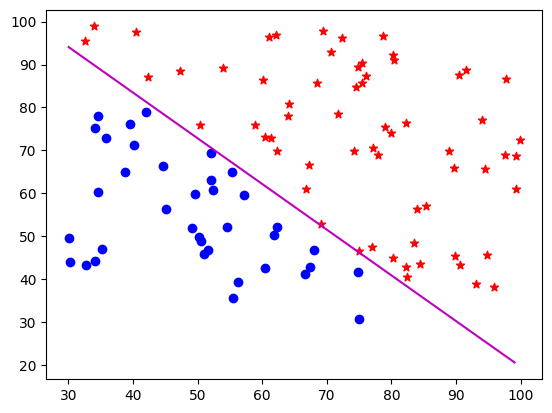

In [10]:
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1_db
belongs, not_belongs = if_belongs_2D(X, theta, False)
plt.scatter(belongs[0, :], belongs[1, :], marker='*', color='r')
plt.scatter(not_belongs[0, :], not_belongs[1, :], marker='o', color='b')
plt.plot(x1_db, x2_db, '-m')
plt.show()

### Zadanie 3

In [11]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

In [12]:
    theta2 = np.array([[0], [0], [0], [0]])
eps = 1e-7
alpha = 0.001

theta2 = logistic_regression(X, y, theta2, eps, alpha)

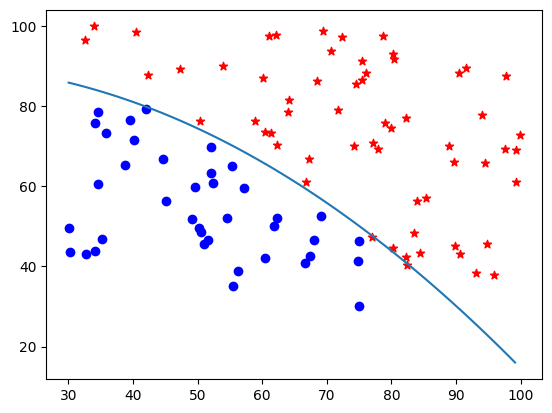

In [13]:
X_min2 = X[1, :].min(); X_max2 = X[1, :].max()
x1_db = np.arange(X_min2, X_max2, 0.01)
x2_db = -theta2[0, 0]/theta2[3, 0] - theta2[1, 0]/theta2[3, 0] * x1_db - theta2[2, 0]/theta2[3, 0] * x1_db ** 2

x1_scaled = x1_db * (X_max[1] - X_min[1]) + X_min[1]
x2_scaled = (x2_db - x2_db.min()) / (x2_db.max() - x2_db.min())
x2_scaled = x2_scaled * (X_max[1] - X_min[1]) + X_min[1] - 14

belongs, not_belongs = if_belongs_2D(X, theta2)
plt.scatter(belongs[0, :] * (X_max[1] - X_min[1]) + X_min[1], belongs[1, :] * (X_max[1] - X_min[1]) + X_min[1], marker='*', color='r')
plt.scatter(not_belongs[0, :] * (X_max[1] - X_min[1]) + X_min[1], not_belongs[1, :] * (X_max[1] - X_min[1]) + X_min[1], marker='o', color='b')
plt.plot(x1_scaled, x2_scaled)
plt.show()

### Zadanie 4

Wczytywanie danych

In [14]:
data = datasets.load_digits()
y = data['target']
x = data['data']

x, x_test, y, y_test = train_test_split(x, y, random_state=42)

Uczenie modelu

In [15]:
eps = 1e-7
alpha = 0.001
no_of_cls = 10

theta = []  # kontener na wagi kolejnych modeli
n = x.shape[1]
m = x.shape[0]
x_scale = x.max()

for cls_id in range(no_of_cls):
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]

    x_tmp = np.array(x) / x_scale  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    theta_cls = np.zeros((n+1, 1))

    prev_cost = 0
    current_cost = calculate_cost(X_cls, y_cls, theta_cls)

    while math.fabs(prev_cost - current_cost) > eps:
        prev_cost = current_cost

        theta_cls = logistic_regression(X_cls, y_cls, theta_cls, eps, alpha)

        current_cost = calculate_cost(X_cls, y_cls, theta_cls)

    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)


Koszt dla klasy 0: 0.02503781395441819.
Koszt dla klasy 1: 0.08484830386365941.
Koszt dla klasy 2: 0.034024489510708626.
Koszt dla klasy 3: 0.06412991363263867.
Koszt dla klasy 4: 0.03888563464815394.
Koszt dla klasy 5: 0.04401064329598705.
Koszt dla klasy 6: 0.036302616104109904.
Koszt dla klasy 7: 0.039602187609986496.
Koszt dla klasy 8: 0.12335601461339571.
Koszt dla klasy 9: 0.07639896400161138.


Reczna ewaluacja i wizualizacja wynikow

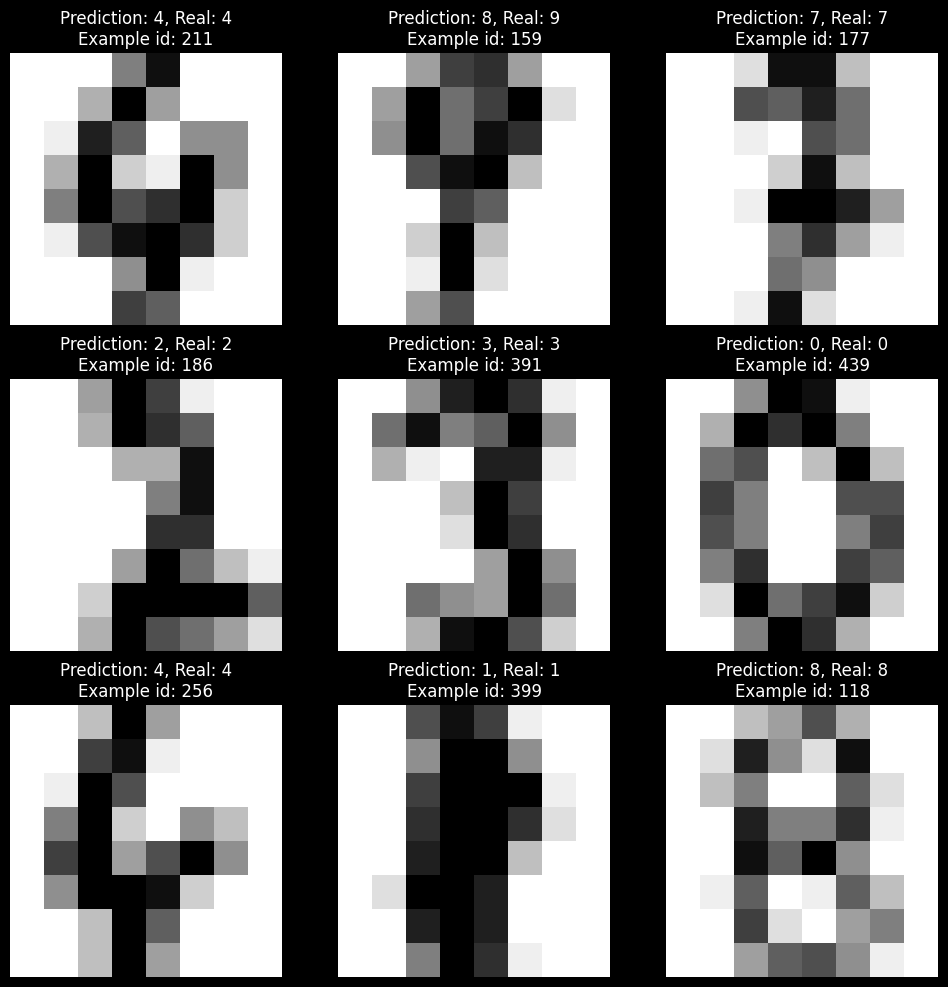

In [16]:
probabs = np.zeros(no_of_cls)
max_example_id = x_test.shape[0]
example_ids_size = 9
example_ids = np.random.randint(0, max_example_id, size=example_ids_size)

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(12, 12)
fig.set_facecolor('black')
plt.gray()

for i in range(example_ids_size):
    example_id = example_ids[i]
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test[example_id]) / x_scale
        X_example = np.array([1, *x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = h_fun(X_example, theta_cls)

    pred = np.argmax(probabs)
    ax[int(i / 3), i % 3].imshow(x_test[example_id].reshape(8, 8), cmap='gray_r')
    ax[int(i / 3), i % 3].axis('off')
    ax[int(i / 3), i % 3].set_title(f"Prediction: {pred}, Real: {y_test[example_id]}\nExample id: {example_id}", fontdict = {'color':'white'})

plt.show()

Tworzenie macierzy pomylek

In [17]:
confusion_matrix = np.zeros((no_of_cls, no_of_cls))

for example_id in range(0, max_example_id):
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test[example_id]) / x_scale
        X_example = np.array([1, *x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = h_fun(X_example, theta_cls)

    pred = np.argmax(probabs)
    confusion_matrix[y_test[example_id], pred] += 1

print("Macierz pomylek:\n", confusion_matrix)

Macierz pomylek:
 [[43.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 32.  2.  0.  0.  0.  0.  0.  1.  2.]
 [ 0.  0. 38.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 43.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0. 55.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 56.  1.  0.  0.  2.]
 [ 1.  0.  0.  0.  0.  0. 44.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 40.  0.  1.]
 [ 0.  2.  0.  0.  0.  1.  0.  0. 35.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  1.  1. 44.]]


Obliczanie czulosci i precyzji

In [18]:
report = []
for i in range(no_of_cls):
    TP = 0
    FN = 0
    FP = 0

    for example_id in range(0, max_example_id):
        for cls_id, theta_cls in enumerate(theta):
            x_example = np.array(x_test[example_id]) / x_scale
            X_example = np.array([1, *x_example])
            X_example = X_example[..., np.newaxis]
            probabs[cls_id] = h_fun(X_example, theta_cls)

        pred = np.argmax(probabs)
        if pred == y_test[example_id] and pred == i:
            TP += 1
        elif y_test[example_id] == i and pred != i:
            FN += 1
        elif y_test[example_id] != i and pred == i:
            FP += 1
    report.append((TP, FN, FP))


print("cls | se | pp")
for cls, report_cls in enumerate(report):
    TP, FN, FP = report_cls
    TPR = TP / (TP + FN)
    PPV = TP / (TP + FP)
    print(f"{cls} | {TPR:.2} | {PPV:.2}")

cls | se | pp
0 | 1.0 | 0.98
1 | 0.86 | 0.91
2 | 1.0 | 0.95
3 | 0.93 | 1.0
4 | 1.0 | 1.0
5 | 0.95 | 0.97
6 | 0.98 | 0.98
7 | 0.98 | 0.98
8 | 0.92 | 0.88
9 | 0.92 | 0.9


### Zadanie 5

In [19]:
eps = 1e-7
alpha = 0.01
no_of_cls = 10

theta = []  # kontener na wagi kolejnych modeli
n = x.shape[1]
m = x.shape[0]
x_scale = x.max()

for cls_id in range(no_of_cls):
    y_cls = (y == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]

    x_tmp = np.array(x) / x_scale  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    x_mean = x_tmp.mean(axis=1)
    x_mean.shape = (-1, 1)
    x_mean = np.transpose(x_mean)
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])
    X_cls = np.concatenate([X_cls, x_mean], axis=0)

    theta_cls = np.zeros((n+2, 1))

    prev_cost = 0
    current_cost = calculate_cost(X_cls, y_cls, theta_cls)

    while math.fabs(prev_cost - current_cost) > eps:
        prev_cost = current_cost

        theta_cls = logistic_regression(X_cls, y_cls, theta_cls, eps, alpha)

        current_cost = calculate_cost(X_cls, y_cls, theta_cls)

    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

Koszt dla klasy 0: 0.010380925549477794.
Koszt dla klasy 1: 0.051030875806108066.
Koszt dla klasy 2: 0.012912409119319146.
Koszt dla klasy 3: 0.036887823993113765.
Koszt dla klasy 4: 0.017826550823574615.
Koszt dla klasy 5: 0.023751074278165182.
Koszt dla klasy 6: 0.017755014715994045.
Koszt dla klasy 7: 0.02069998655643204.
Koszt dla klasy 8: 0.09354927333196358.
Koszt dla klasy 9: 0.04376002669415459.


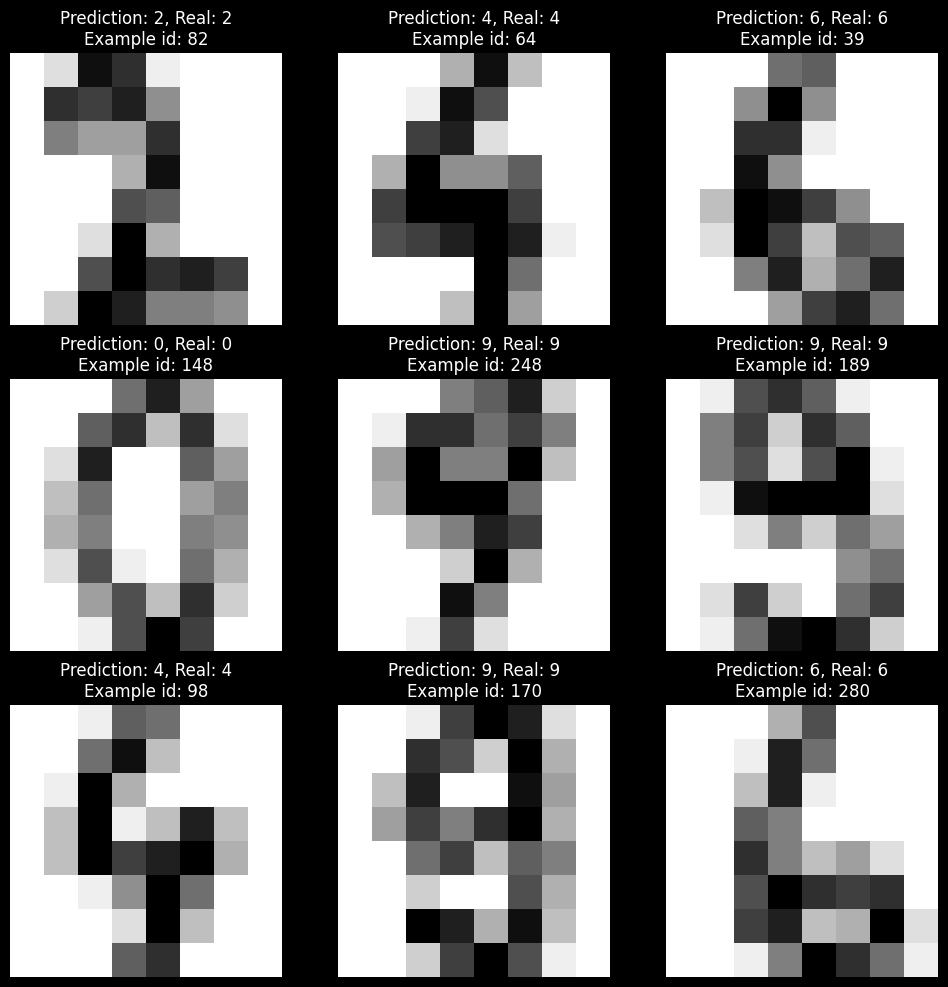

In [20]:
probabs = np.zeros(no_of_cls)
max_example_id = x_test.shape[0]
example_ids_size = 9
example_ids = np.random.randint(0, max_example_id, size=example_ids_size)

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(12, 12)
fig.set_facecolor('black')
plt.gray()

for i in range(example_ids_size):
    example_id = example_ids[i]
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test[example_id]) / x_scale
        X_example = np.array([1, *x_example, x_example.mean()])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = h_fun(X_example, theta_cls)

    pred = np.argmax(probabs)
    ax[int(i / 3), i % 3].imshow(x_test[example_id].reshape(8, 8), cmap='gray_r')
    ax[int(i / 3), i % 3].axis('off')
    ax[int(i / 3), i % 3].set_title(f"Prediction: {pred}, Real: {y_test[example_id]}\nExample id: {example_id}", fontdict = {'color':'white'})

plt.show()

In [21]:
confusion_matrix = np.zeros((no_of_cls, no_of_cls))

for example_id in range(0, max_example_id):
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_test[example_id]) / x_scale
        X_example = np.array([1, *x_example, x_example.mean()])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = h_fun(X_example, theta_cls)

    pred = np.argmax(probabs)
    confusion_matrix[y_test[example_id], pred] += 1

print("Macierz pomylek:\n", confusion_matrix)

Macierz pomylek:
 [[43.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 36.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 38.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 43.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0. 55.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. 55.  1.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  1. 44.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 40.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  0.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  2. 45.]]


In [22]:
report = []
for i in range(no_of_cls):
    TP = 0
    FN = 0
    FP = 0

    for example_id in range(0, max_example_id):
        for cls_id, theta_cls in enumerate(theta):
            x_example = np.array(x_test[example_id]) / x_scale
            X_example = np.array([1, *x_example, x_example.mean()])
            X_example = X_example[..., np.newaxis]
            probabs[cls_id] = h_fun(X_example, theta_cls)

        pred = np.argmax(probabs)
        if pred == y_test[example_id] and pred == i:
            TP += 1
        elif y_test[example_id] == i and pred != i:
            FN += 1
        elif y_test[example_id] != i and pred == i:
            FP += 1
    report.append((TP, FN, FP))


print("cls | se | pp")
for cls, report_cls in enumerate(report):
    TP, FN, FP = report_cls
    TPR = TP / (TP + FN)
    PPV = TP / (TP + FP)
    print(f"{cls} | {TPR:.2} | {PPV:.2}")

cls | se | pp
0 | 1.0 | 1.0
1 | 0.97 | 0.97
2 | 1.0 | 0.95
3 | 0.93 | 1.0
4 | 1.0 | 1.0
5 | 0.93 | 0.93
6 | 0.98 | 0.98
7 | 0.98 | 1.0
8 | 0.95 | 0.9
9 | 0.94 | 0.94
